<a href="https://colab.research.google.com/github/vaibhav-1508/CrystalGraphRepresentation/blob/main/OQMD_v1_2_dataset_for_CGNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The OQMD v1.2 Dataset

In [2]:
!wget -q "https://drive.google.com/uc?export=download&id=1I6nS4l15SeX5S4VcU3jKG5Iqvomj7eXB" -O oqmd.7z
!7z x -bsp0 -bso0 oqmd.7z

In [3]:
!ls oqmd_dataset

config.json  graph_data.npz  License  oqmd_dataset_utils.py  split.json  summary.txt  targets.csv


In [4]:
!fmt oqmd_dataset/summary.txt


oqmd_data.py 562/562 [3:16:30<00:00, 19.71s/it]

mp_graph.py [Parallel(n_jobs=-1)]: Done 562 out of 562 | elapsed:
186.1min finished

oqmd.py Total Data: 561888 unique_z: 89 min z: 1 max z: 94 [ 1  2  3  4
5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 89 90 91 92 93 94]
Unary formulas: 89 Multi formulas: 338047 Train formulas: 270528 Val
formulas: 33804 Test formulas: 33804 Train: 449867 Val: 56289 Test: 55732



# Data Loading

In [5]:
import pandas as pd

dataset_path = "oqmd_dataset/targets.csv"
dataset = pd.read_csv(dataset_path, keep_default_na=False, na_values=['_'])
dataset.head()

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
0,oqmd-823191,ZrZnNiMo,216,4,4,-6.399036,0.157939,0.0,16.014199,0.452473,22.799641,-0.423714
1,oqmd-362450,DySc2Ir,225,3,4,-6.795189,-0.266899,0.0,19.931045,0.212367,31.566053,-0.583763
2,oqmd-758369,YZr,59,2,16,-7.445319,0.060478,0.0,27.308156,0.002801,38.264481,-0.401211
3,oqmd-516941,CrMoAu2,225,3,4,-6.218335,0.504200,0.0,15.436073,0.715628,23.006243,-0.490421
4,oqmd-344596,Ge3O,221,2,4,-4.382844,0.215750,0.0,15.868661,0.000000,6.251735,0.606033


array([[<Axes: title={'center': 'formation_energy_per_atom'}>]],
      dtype=object)

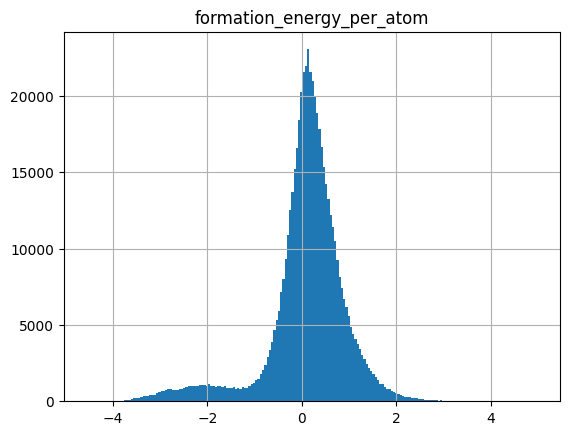

In [6]:
dataset.hist(column="formation_energy_per_atom", bins=200)

In [7]:
import json
config_path="oqmd_dataset/config.json"
with open(config_path) as f:
  config = json.load(f)

In [8]:
config.keys()

dict_keys(['node_vectors', 'atomic_numbers'])

In [9]:
for element_id in range(5):
  z = config["atomic_numbers"][element_id]
  v = config["node_vectors"][element_id]
  print(f'{z:2d} {v[:10]}')
print('')
for element_id in range(84,89):
  z = config["atomic_numbers"][element_id]
  v = config["node_vectors"][element_id]
  print(f'{z:2d} {v[79:]}')

 1 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 2 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 3 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 4 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 5 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

90 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
91 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
92 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
93 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
94 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [10]:
!cat oqmd_dataset/oqmd_dataset_utils.py

import numpy as np

def load_graph_data(graph_data_path):
  """
  This function loads graph data from the specified file.

  Example:
    >>> graphs = load_graph_data("oqmd_dataset/graph_data.npz")
    >>> oqmd_id = "oqmd-758369"
    >>> nodes, neighbors = graphs[oqmd_id]
    >>> nodes
    [38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39]
    >>> neighbors
    [[1, 6, 6, 7, 7, 13, 13],
     [0, 0, 2, 7, 7, 11, 11, 13, 13, 14, 14],
     [1, 3, 3, 4, 4, 11, 11, 14, 14, 15, 15],
    ...
  """
  graphs = np.load(graph_data_path, allow_pickle=True, encoding='latin1')['graph_dict'].item()
  graphs = { k.decode() : v for k, v in graphs.items() }
  return graphs


In [11]:
import sys

sys.path.append("oqmd_dataset")

from oqmd_dataset_utils import load_graph_data

graphs = load_graph_data("oqmd_dataset/graph_data.npz")

In [12]:
formula0 = "ZrO2"

def get_subset(formula):
  return dataset[dataset["formula"] == formula].sort_values("formation_energy_per_atom")

oqmd_id = get_subset(formula=formula0)["name"].tolist()[0]
nodes, neighbors = graphs[oqmd_id]

In [13]:
oqmd_id

'oqmd-3278'

In [14]:
nodes

[7, 7, 7, 7, 7, 7, 7, 7, 39, 39, 39, 39]

In [15]:
neighbors

[[8, 9],
 [8, 9],
 [8, 9],
 [8, 9],
 [10, 11],
 [10, 11],
 [10, 11],
 [10, 11],
 [0, 1, 2, 3, 6, 9, 9, 10, 10, 11, 11],
 [0, 1, 2, 3, 5, 8, 8, 10, 10, 11, 11],
 [2, 4, 5, 6, 7, 8, 8, 9, 9, 11, 11],
 [1, 4, 5, 6, 7, 8, 8, 9, 9, 10, 10]]

In [16]:
dataset[dataset["name"] == oqmd_id]

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
183001,oqmd-3278,ZrO2,14,2,12,-9.49757,-3.632982,3.843,11.965782,0.000015,12.514709,-0.045875


In [17]:
!wget -q https://github.com/lmmentel/mendeleev/blob/master/mendeleev/elements.db?raw=true -O elements.db

In [18]:
from dataclasses import dataclass

@dataclass
class Element:
    symbol: float
    jmol_color: float

In [19]:
import sqlite3
dbname = 'elements.db'
conn = sqlite3.connect(dbname)
cur = conn.cursor()
cur.execute('SELECT atomic_number, symbol, jmol_color FROM elements')
element = dict()
for row in cur:
    element[row[0]] = Element(symbol=row[1], jmol_color=row[2])
conn.close()

In [20]:
import graphviz

In [21]:
dot = graphviz.Digraph(f'{oqmd_id}', comment=f'{formula0} in OQMD ({oqmd_id})', engine='neato')
dot.attr(overlap='false', size='6,6')

dot.attr('node', shape='circle', style='filled')
for i, element_id in enumerate(nodes):
  z = config["atomic_numbers"][element_id]
  e = element[z]
  dot.node(f'{i}', f'{e.symbol}@{i}', color=e.jmol_color)

dot.attr('edge', constraint='false', penwidth='2')
for i, element_id in enumerate(nodes):
  z = config["atomic_numbers"][element_id]
  e = element[z]
  for j in neighbors[i]:
    dot.edge(f'{i}', f'{j}', color=e.jmol_color)


In [22]:
# print(dot.source)

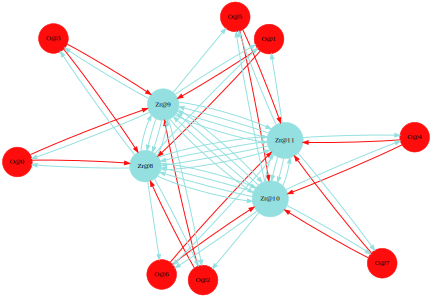

In [23]:
dot

# Original Data and Structures

We can obtain the original data from the online database by using the OQMD API.

In [24]:
import json, requests

def get_oqmd_entry(entry_id):
  base_url = 'http://oqmd.org/oqmdapi/entry'
  url = f'{base_url}/{entry_id}'

  response = requests.get(url)
  if response.status_code != 200:
    print('Status code:', response.status_code)
  else:
    response = json.loads(response.text)
    return response

In [25]:
entry_id = int(oqmd_id.split('-')[1])
get_oqmd_entry(entry_id)

{'id': 3278,
 'name': 'ZrO2',
 'path': '/home/oqmd/libraries/icsd/15983',
 'icsd_id': '15983',
 'composition': 'O2 Zr1',
 'composition_generic': 'AB2',
 'prototype': 'ZrO2(mP)',
 'spacegroup': None,
 'volume': None,
 'ntypes': 2,
 'natoms': 12,
 'unit_cell': None,
 'sites': None,
 'energy_per_atom': -9.49757019,
 'band_gap': 3.843,
 'formation_energy': -3.63298243058584,
 'stability': -0.4717609644791705,
 'keywords': ['icsd'],
 'holds': [],
 'calculations': [{'id': 37919,
   'path': '/home/oqmd/libraries/icsd/15983/standard',
   'label': 'standard'},
  {'id': 801995,
   'path': '/home/oqmd/libraries/icsd/15983/static',
   'label': 'static'},
  {'id': 1988392,
   'path': '/home/oqmd/libraries/icsd/15983/relaxation_lda',
   'label': 'relaxation_lda'},
  {'id': 1997902,
   'path': '/home/oqmd/libraries/icsd/15983/static_lda',
   'label': 'static_lda'}]}

In [26]:
get_oqmd_entry(entry_id=344596)

{'id': 344596,
 'name': 'Ge3O',
 'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge',
 'icsd_id': None,
 'composition': 'Ge3 O1',
 'composition_generic': 'AB3',
 'prototype': 'L1_2_Cu3Au',
 'spacegroup': 'Pm-3m',
 'volume': 81.0787,
 'ntypes': 2,
 'natoms': 4,
 'unit_cell': [[4.32815, 0.0, 0.0], [0.0, 4.32815, 0.0], [0.0, 0.0, 4.32815]],
 'sites': ['Ge @ 0 0.5 0.5', 'Ge @ 0.5 0 0.5', 'Ge @ 0.5 0.5 0', 'O @ 0 0 0'],
 'energy_per_atom': -4.382843515,
 'band_gap': 0.0,
 'formation_energy': 0.21574978978031,
 'stability': 0.9247098084374985,
 'keywords': ['prototype', 'L1_2'],
 'holds': [],
 'calculations': [{'id': 352471,
   'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge/initialize',
   'label': 'initialize'},
  {'id': 352472,
   'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge/coarse_relax',
   'label': 'coarse_relax'},
  {'id': 352473,
   'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge/fine_relax',
   'label': 'fine_relax'},
  {'id': 352474,


In [27]:
import json, requests

base_url = 'http://oqmd.org/optimade/structures'
url = f'{base_url}?filter=chemical_formula_descriptive="{formula0}"'
# If you want to know details of "chemical_formula_descriptive", see the link below:
# https://github.com/Materials-Consortia/OPTIMADE/blob/v1.0/optimade.rst#id65

response = requests.get(url)
if response.status_code != 200:
  print('Status code:', response.status_code)
  print('You can see its meaning at https://developer.mozilla.org/en-US/docs/Web/HTTP/Status')
else:
  response = json.loads(response.text)
  if 'detail' in response.keys():
    print(response['detail'])
  else:
    print('Meta data:')
    display(response['meta'])

Meta data:


{'query': {'representation': 'http://oqmd.org/optimade/structures?filter=chemical_formula_descriptive=%22ZrO2%22',
  '_oqmd_final_query': "( composition__formula__in=['O2 Zr1'] )"},
 'api_version': '1.0.0',
 'time_stamp': '2024-11-24 23:53:22',
 '_oqmd_data_in_response': 42,
 'data_returned': 42,
 'data_available': 1226781,
 'more_data_available': False,
 'provider': {'name': 'OQMD',
  'description': 'The Open Quantum Materials Database',
  'prefix': 'oqmd',
  'homepage': 'http://oqmd.org'},
 'warnings': [],
 'response_message': 'OK'}

In [28]:
response['data'][0].keys()

dict_keys(['id', 'type', 'attributes'])

We retrieve the structure with the wanted entry id from the database response.

In [29]:
entry_structure = None
for x in response['data']:
  x = x['attributes']
  if x['_oqmd_entry_id'] == entry_id:
    entry_structure = x
    break

if entry_structure == None:
  print(f'No structure for the entry {entry_id}')

In [30]:
entry_structure

{'last_modified': None,
 'chemical_formula_reduced': 'O2Zr',
 'chemical_formula_anonymous': 'A2B',
 'nelements': 2,
 'elements': ['O', 'Zr'],
 'nsites': 12,
 'lattice_vectors': [[5.18462, 0.0, 0.008175],
  [0.0, 5.211486, 0.0],
  [0.890761, 0.0, 5.315677]],
 'species_at_sites': ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'Zr',
  'Zr',
  'Zr',
  'Zr'],
 'nperiodic_dimensions': 3,
 'structure_features': [],
 'chemical_formula_descriptive': 'O2Zr',
 'cartesian_site_positions': [[2.36194, 1.27627, 0.13447],
  [0.42102, 3.5834, 0.73934],
  [5.20898, 0.97766, 1.92667],
  [3.26807, 3.88201, 2.53154],
  [2.80732, 1.32948, 2.79231],
  [0.8664, 4.23383, 3.39718],
  [5.65436, 1.62809, 4.58451],
  [3.71345, 3.93522, 5.18937],
  [3.94249, 2.38202, 1.13006],
  [1.68751, 4.98776, 1.53595],
  [4.38787, 0.22372, 3.7879],
  [2.13289, 2.82946, 4.19379]],
 '_oqmd_entry_id': 3278,
 '_oqmd_calculation_id': 801995,
 '_oqmd_icsd_id': 15983,
 '_oqmd_band_gap': 3.843,
 '_oqmd_delta_e': -3.633,
 '_o

In [31]:
n = entry_structure['nsites']
print(n)
print(f'{formula0} {oqmd_id} in XYZ format')
for i in range(n):
  s = entry_structure['species_at_sites'][i]
  x, y, z = entry_structure['cartesian_site_positions'][i]
  print(f'{s:2s} {x:10.6f} {y:10.6f} {z:10.6f}')

12
ZrO2 oqmd-3278 in XYZ format
O    2.361940   1.276270   0.134470
O    0.421020   3.583400   0.739340
O    5.208980   0.977660   1.926670
O    3.268070   3.882010   2.531540
O    2.807320   1.329480   2.792310
O    0.866400   4.233830   3.397180
O    5.654360   1.628090   4.584510
O    3.713450   3.935220   5.189370
Zr   3.942490   2.382020   1.130060
Zr   1.687510   4.987760   1.535950
Zr   4.387870   0.223720   3.787900
Zr   2.132890   2.829460   4.193790


In [32]:
for i in range(3):
  x, y, z = entry_structure['lattice_vectors'][i]
  print(f'{x:10.6f} {y:10.6f} {z:10.6f}')

  5.184620   0.000000   0.008175
  0.000000   5.211486   0.000000
  0.890761   0.000000   5.315677


# Gallery

In [33]:
import cv2
import numpy as np

def square_image(data):
  img_buf= np.frombuffer(data, dtype=np.uint8)
  img = cv2.imdecode(img_buf, cv2.IMREAD_UNCHANGED)
  bgc = img[0,0,:]
  height, width, _ = img.shape
  if height > width:
    new_img = np.full(shape=(height, height, len(bgc)), fill_value=bgc, dtype=np.uint8)
    shift = int(float(height-width)/2)
    new_img[:,shift:shift+width,:] = img
  else:
    new_img = np.full(shape=(width, width, len(bgc)), fill_value=bgc, dtype=np.uint8)
    shift = int(float(width-height)/2)
    new_img[shift:shift+height,:,:] = img
  return cv2.imencode('.png', new_img)[1].tobytes()

In [34]:
def gen_graph_image(oqmd_id, size=4, bgcolor='white'):
  nodes, neighbors = graphs[oqmd_id]

  dot = graphviz.Digraph(f'{oqmd_id}', comment=f'{oqmd_id}', engine='neato')
  dot.attr(overlap='false', size=f'{size}', bgcolor=bgcolor)

  dot.attr('node', shape='circle', style='filled')
  for i, element_id in enumerate(nodes):
    z = config["atomic_numbers"][element_id]
    e = element[z]
    dot.node(f'{i}', f'{e.symbol}', color=e.jmol_color)

  dot.attr('edge', constraint='false', penwidth='2')
  for i, element_id in enumerate(nodes):
    z = config["atomic_numbers"][element_id]
    e = element[z]
    for j in neighbors[i]:
      dot.edge(f'{i}', f'{j}', color=e.jmol_color)

  return square_image(dot.pipe(format='png'))

In [35]:
from ipywidgets import HBox, VBox, Image, HTML

def gen_boxes(formula, length=100, max_num_boxes=5, bgcolor='white'):
  oqmd_ids = get_subset(formula=formula)["name"].tolist()

  boxes = []
  for x in oqmd_ids[:max_num_boxes]:
    image = gen_graph_image(oqmd_id=x, size=4*length/100, bgcolor=bgcolor)
    box = Image(
      value=image,
      format='png',
      width=length,
      height=length,
    )
    h = HTML(value=x)
    vb = VBox([h, box])
    vb.layout.align_items = 'center'
    vb.layout.border = '1px solid gray'
    boxes.append(vb)
  return boxes

In [36]:
def show_table_and_graphs(formula):
  display(get_subset(formula))
  hb = HBox(gen_boxes(formula, length=300))
  display(hb)

In [37]:
show_table_and_graphs(formula='BaTiO3')

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
507954,oqmd-13238,BaTiO3,99,3,5,-7.925843,-3.287548,1.680,13.029152,0.000025,18.412103,-0.413147
420797,oqmd-6455,BaTiO3,194,3,30,-7.925424,-3.287129,1.773,13.259104,0.000317,18.412103,-0.388639
93642,oqmd-681890,BaTiO3,221,3,5,-7.919548,-3.281254,1.769,12.864987,0.000044,18.412103,-0.431179
10967,oqmd-825487,BaTiO3,221,3,5,-7.919336,-3.281042,1.700,12.857922,0.000015,18.412103,-0.431966
139171,oqmd-678653,BaTiO3,148,3,10,-7.814859,-3.176565,3.336,14.417415,0.000073,18.412103,-0.277074
496647,oqmd-681891,BaTiO3,62,3,20,-7.790627,-3.152333,2.986,17.499136,0.000099,18.412103,-0.052172
60783,oqmd-827155,BaTiO3,167,3,10,-7.487518,-2.849224,2.402,18.775167,0.000051,18.412103,0.019337
233733,oqmd-103739,BaTiO3,38,3,5,-7.165238,-2.526943,0.000,19.445630,0.000705,18.412103,0.053150
11217,oqmd-97435,BaTiO3,38,3,5,-7.158258,-2.519964,0.000,19.238438,0.006398,18.412103,0.042952
172717,oqmd-680271,BaTiO3,99,3,5,-6.612654,-1.974360,0.000,14.755117,0.005681,18.412103,-0.247845
